In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv', index_col='Serial No.')

In [3]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [4]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
Y = df['Chance of Admit ']
X = df.drop('Chance of Admit ', axis=1)

In [6]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1
497,337,117,5,5.0,5.0,9.87,1
498,330,120,5,4.5,5.0,9.56,1


In [7]:
Y

Serial No.
1      0.92
2      0.76
3      0.72
4      0.80
5      0.65
       ... 
496    0.87
497    0.96
498    0.93
499    0.73
500    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [8]:
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

In [9]:
X_PCA = pd.DataFrame(X_PCA, columns=['PCA1', 'PCA2'])

In [10]:
X_PCA

,PCA1,PCA2
0,-23.273887,-0.783279
1,-6.811715,3.351076
2,1.841991,2.687708
3,-6.140811,-0.024660
4,4.212021,2.824404
...,...,...
495,-14.484897,5.912684
496,-22.957009,-0.008506
497,-17.942750,-5.731901
498,5.690921,1.610405


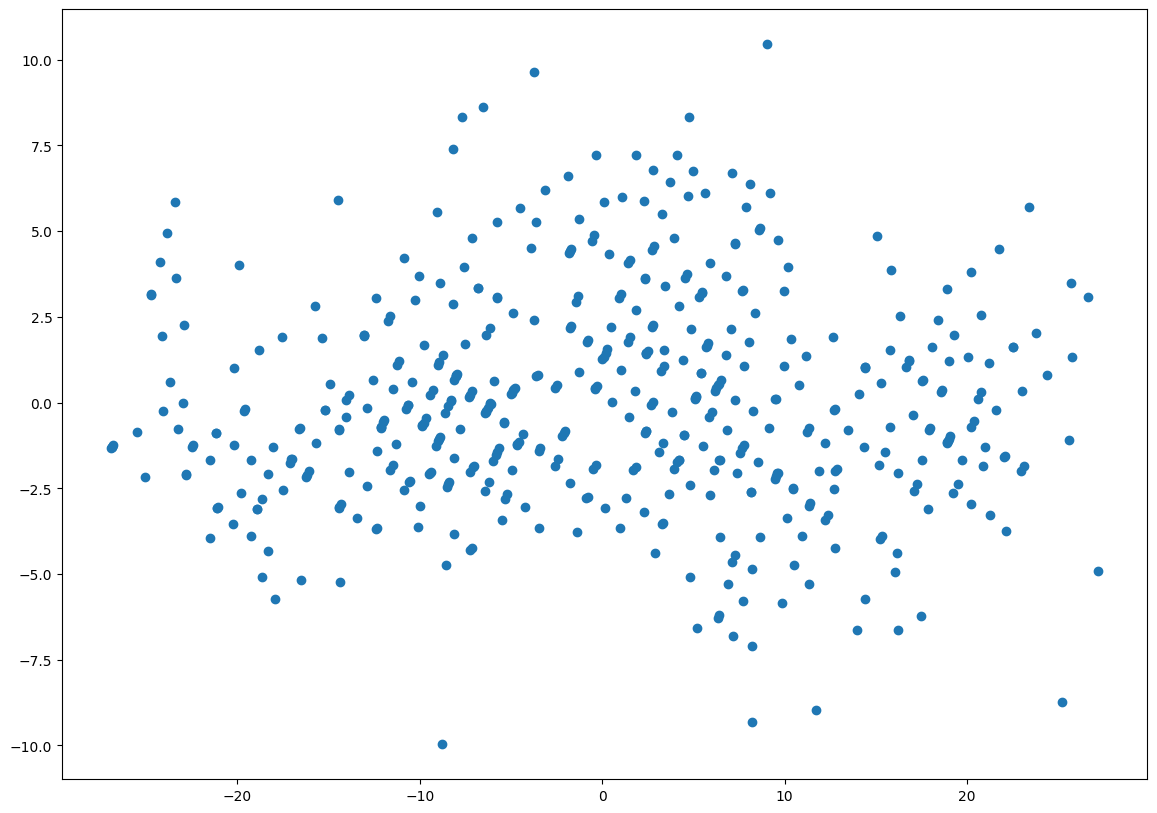

In [11]:
plt.figure(figsize=(14, 10))
plt.scatter(X_PCA['PCA1'], X_PCA['PCA2'])
plt.show()

In [12]:
pca_max = np.argmax(X_PCA['PCA1'])
pca_min = np.argmin(X_PCA['PCA2'])

In [13]:
print(pca_max, pca_min)

377 297


In [14]:
X.iloc[pca_max, :]

GRE Score            290.00
TOEFL Score          100.00
University Rating      1.00
SOP                    1.50
LOR                    2.00
CGPA                   7.56
Research               0.00
Name: 378, dtype: float64

In [15]:
X.iloc[pca_min, :]

GRE Score            320.00
TOEFL Score          120.00
University Rating      3.00
SOP                    4.00
LOR                    4.50
CGPA                   9.11
Research               0.00
Name: 298, dtype: float64

In [16]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
X = pd.DataFrame(X)

In [18]:
X

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0
...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, shuffle=True)

In [20]:
X_train.shape

(400, 7)

In [21]:
X_test.shape

(100, 7)

In [22]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
model.score(X_test, Y_test)

0.8033342138842108

In [24]:
pred = model.predict(X_test)

In [25]:
pred

array([0.74753361, 0.79614394, 0.8844349 , 0.60454443, 0.85363988,
       0.60815422, 0.52560078, 0.61100966, 0.83676418, 0.62305549,
       0.61599067, 0.71518054, 0.87405752, 0.82068252, 0.74204031,
       0.5925053 , 0.91564273, 0.55877044, 0.73630297, 0.75339587,
       0.68557782, 0.84338236, 0.90560594, 0.65688502, 0.98017745,
       0.96587131, 0.94374355, 0.83576301, 0.7535464 , 0.62043878,
       0.68611545, 0.67099848, 0.46068711, 0.65517047, 0.6629511 ,
       0.87352026, 0.60755681, 0.62443448, 0.55969274, 0.72898502,
       0.7678336 , 0.71558387, 0.60536844, 0.52195323, 0.69724066,
       0.62597665, 0.61642299, 0.62920932, 0.57252452, 0.70216123,
       0.66763592, 0.95778973, 0.58250926, 0.80594   , 0.85733618,
       0.58982522, 0.96232798, 0.6569618 , 0.72150769, 0.88151769,
       0.72333531, 0.61550177, 0.77510798, 0.63618622, 0.55873886,
       0.72423109, 0.77635526, 0.65393465, 0.73204091, 0.84651759,
       0.6830393 , 0.68853893, 0.88328072, 0.79669347, 0.76275

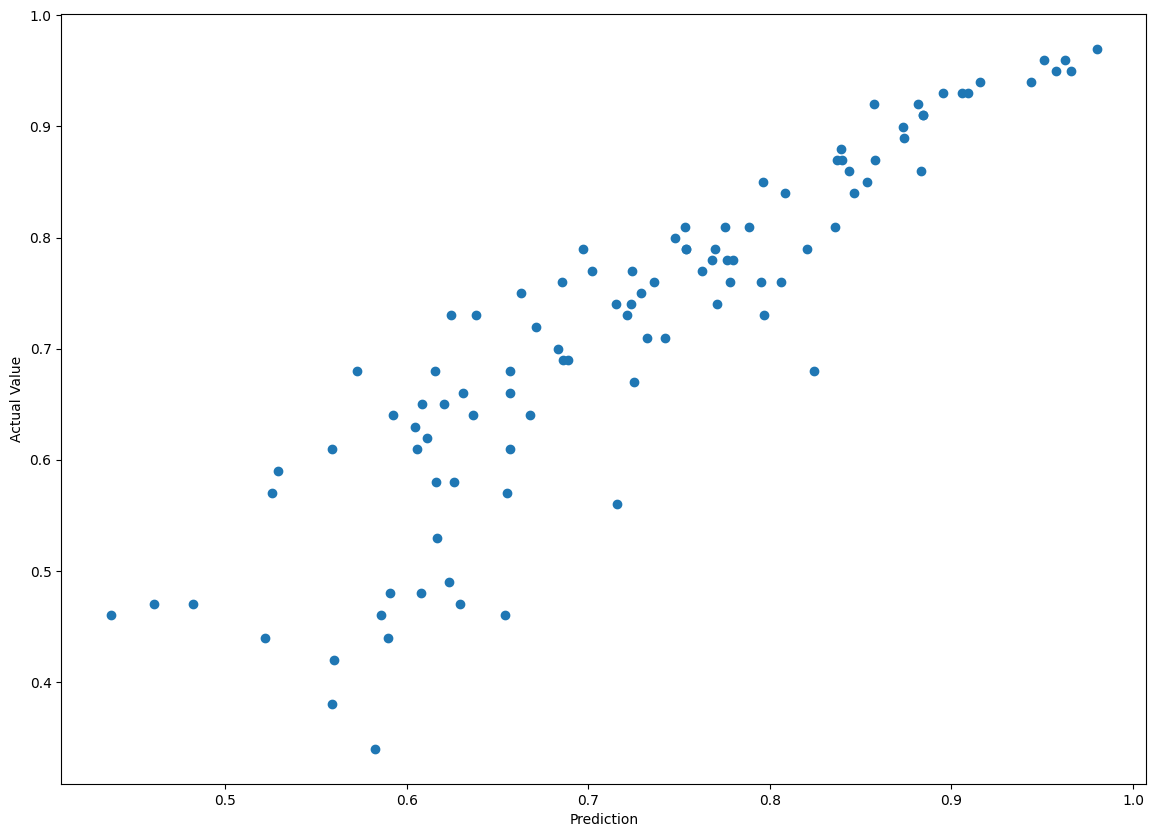

In [26]:
plt.figure(figsize=(14, 10))
plt.scatter(pred, Y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual Value')
plt.show()

In [27]:
# Inference Function

def predict_probability(model, features):
    features = np.array(features).reshape(-1, 1)
    return model.predict(features)

In [28]:
# gre: int, toefl: int, university_rating: int, sop: float, lor: float, cgpa: float, research: int

In [29]:
import numpy as np

def predict_probability(model, features):

    features = np.array(features).reshape(1, -1)
    return model.predict(features)

# Example usage:
input_features = [303, 102, 3, 4, 4.5, 9.43, 0] # Replace with your actual features
predicted_probability = predict_probability(model, input_features)

print("Predicted probability:", predicted_probability)

Predicted probability: [37.44353538]
